In [10]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt

In [37]:
true_vals = np.load("val_binding_labels.npy")
unft_epoch19_logits = np.load("Rostlab_prot_t5_xl_uniref50_epoch_19_20231205_151645_logits.npy")
checkpoint_100k_logits = np.load("checkpoint-100000_epoch_19_20231205_154949_logits.npy")
checkpoint_200k_logits = np.load("checkpoint-200000_epoch_19_20231205_162236_logits.npy")
checkpoint_300k_logits = np.load("checkpoint-300000_epoch_19_20231205_165525_logits.npy")



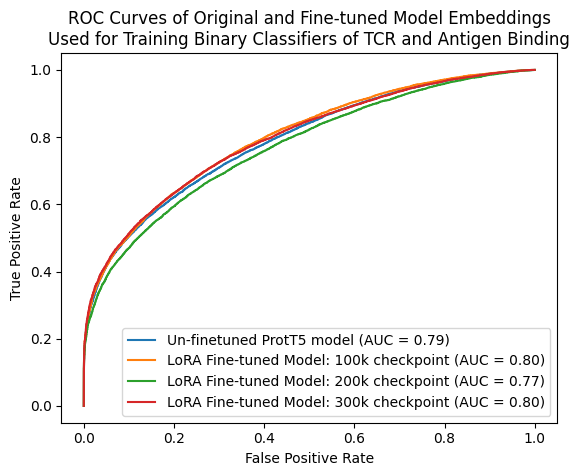

In [43]:
fig, ax = plt.subplots()
models = [unft_epoch19_logits,checkpoint_100k_logits, checkpoint_200k_logits, checkpoint_300k_logits]
names = ["Un-finetuned ProtT5 model", "LoRA Fine-tuned Model: 100k checkpoint", "LoRA Fine-tuned Model: 200k checkpoint", "LoRA Fine-tuned Model: 300k checkpoint"]
for model,name in zip(models,names):
    fpr, tpr, thresholds = metrics.roc_curve(true_vals, model, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot(ax=ax)
plt.title("ROC Curves of Original and Fine-tuned Model Embeddings\nUsed for Training Binary Classifiers of TCR and Antigen Binding")
plt.show()
fig.savefig("rocfig.png", dpi=1200)